In [ ]:
import pandas as pd
import torch
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import unicodedata as uni
import missingno as msno
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Load the dataset
df = pd.read_csv("VHin.csv")
df.shape

(181, 2)

In [ ]:
def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text

In [ ]:
!pip install demoji

In [ ]:
import demoji

def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string

In [ ]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()

    return text

In [ ]:
from nltk.corpus import stopwords

en_stopwords = set(stopwords.words('english'))
#print(f"Stop Words in English : \n{ en_stopwords}")

In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in en_stopwords]
    return text

In [ ]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stemming(text):

    text = [stemmer.stem(word) for word in text]
    return text

In [ ]:
import spacy

sp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatization(text):

    text = " ".join(text)
    token = sp(text)

    text = [word.lemma_ for word in token]
    return text

# Working on the data

In [ ]:
df_temp = df.copy()
df.head()

,review,rating
0,Soft cloth. Fitting is good. Overall a great buy!,5
1,Superb stich quality..fabric is on the shinier...,4
2,I use to wear Louis Philippe Formal pants and ...,3
3,1. The product is exactly the way it looks in ...,5
4,"Used, altered and torn trouser.",1


In [ ]:
def label(y):
    if y >= 4:
        return 1
    else:
        return 0

from tqdm import tqdm

tqdm.pandas()

df_temp['y'] = df_temp['rating'].progress_map(label)

100%|██████████| 181/181 [00:00<00:00, 117427.54it/s]


In [ ]:
df_temp = df_temp[['review', 'y', 'rating']]

In [ ]:
df_temp.head()

,review,y,rating
0,Soft cloth. Fitting is good. Overall a great buy!,1,5
1,Superb stich quality..fabric is on the shinier...,1,4
2,I use to wear Louis Philippe Formal pants and ...,0,3
3,1. The product is exactly the way it looks in ...,1,5
4,"Used, altered and torn trouser.",0,1


In [ ]:
df_temp.y.value_counts()

y
1    118
0     63
Name: count, dtype: int64

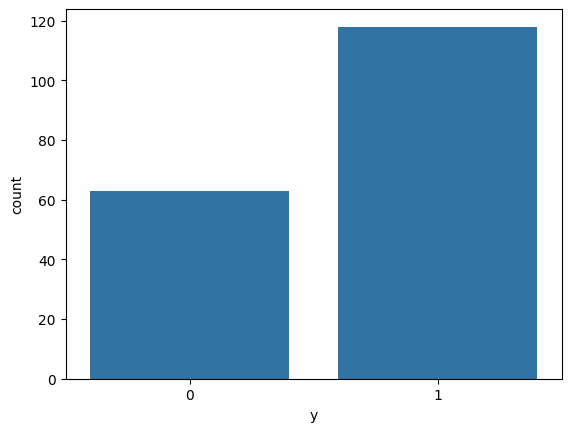

In [ ]:
import seaborn as sns

sns.countplot(x = "y", data = df_temp)
plt.show()

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  178 non-null    object
 1   y       181 non-null    int64 
 2   rating  181 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.4+ KB


In [ ]:
df = df_temp
df.head()

,review,y,rating
0,Soft cloth. Fitting is good. Overall a great buy!,1,5
1,Superb stich quality..fabric is on the shinier...,1,4
2,I use to wear Louis Philippe Formal pants and ...,0,3
3,1. The product is exactly the way it looks in ...,1,5
4,"Used, altered and torn trouser.",0,1


In [ ]:
def preprocessing(text):

    text = remove_url(text)
    text = handle_emoji(text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    text = stemming(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = " ".join(text)

    return text

In [ ]:
# Replace empty values in the 'Body' column with "No review provided"
df['review'].fillna("No review provided", inplace=True)

In [ ]:
from tqdm import tqdm

tqdm.pandas()

df['clean_review'] = df['review'].progress_map(preprocessing)

100%|██████████| 181/181 [00:02<00:00, 69.13it/s] 


In [ ]:
df.head()

,review,y,rating,clean_review
0,Soft cloth. Fitting is good. Overall a great buy!,1,5,soft cloth fit good overal great buy
1,Superb stich quality..fabric is on the shinier...,1,4,superb stich qualityfabr shinier side overal love
2,I use to wear Louis Philippe Formal pants and ...,0,3,I use wear loui philipp formal pant fit good h...
3,1. The product is exactly the way it looks in ...,1,5,1 product exactli way look pic2 materi durable...
4,"Used, altered and torn trouser.",0,1,use alter tear trouser


In [ ]:
reviews = df.clean_review.values.tolist()

In [ ]:
from tqdm import tqdm

tqdm.pandas()

df['clean_review2'] = df['clean_review'].progress_map(word_tokenizer)

100%|██████████| 181/181 [00:00<00:00, 155695.04it/s]


In [ ]:
df.head()

,review,y,rating,clean_review,clean_review2
0,Soft cloth. Fitting is good. Overall a great buy!,1,5,soft cloth fit good overal great buy,"[soft, cloth, fit, good, overal, great, buy]"
1,Superb stich quality..fabric is on the shinier...,1,4,superb stich qualityfabr shinier side overal love,"[superb, stich, qualityfabr, shinier, side, ov..."
2,I use to wear Louis Philippe Formal pants and ...,0,3,I use wear loui philipp formal pant fit good h...,"[i, use, wear, loui, philipp, formal, pant, fi..."
3,1. The product is exactly the way it looks in ...,1,5,1 product exactli way look pic2 materi durable...,"[1, product, exactli, way, look, pic2, materi,..."
4,"Used, altered and torn trouser.",0,1,use alter tear trouser,"[use, alter, tear, trouser]"


In [ ]:
data_words = df['clean_review2'].values.tolist()
len(data_words)

181

In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [ ]:
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from pprint import pprint

# number of topics
num_topics = 10
# Build LDA model
lda_model = LdaMulticore(corpus=corpus, id2word=id2word,
                     num_topics=num_topics, iterations=400)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.045*"good" + 0.028*"nice" + 0.026*"i" + 0.026*"fit" + 0.017*"product" + '
  '0.017*"veri" + 0.017*"size" + 0.015*"thi" + 0.015*"one" + 0.013*"trouser"'),
 (1,
  '0.060*"fit" + 0.040*"good" + 0.034*"price" + 0.034*"fabric" + '
  '0.020*"product" + 0.020*"i" + 0.020*"thi" + 0.014*"awesom" + '
  '0.014*"qualiti" + 0.014*"well"'),
 (2,
  '0.043*"wa" + 0.034*"good" + 0.031*"thi" + 0.028*"qualiti" + 0.028*"i" + '
  '0.028*"fit" + 0.025*"product" + 0.022*"shirt" + 0.019*"buy" + '
  '0.019*"fabric"'),
 (3,
  '0.047*"qualiti" + 0.028*"cloth" + 0.028*"good" + 0.028*"fit" + 0.024*"veri" '
  '+ 0.019*"product" + 0.014*"fabric" + 0.014*"perfect" + 0.014*"show" + '
  '0.010*"nice"'),
 (4,
  '0.035*"i" + 0.035*"get" + 0.026*"good" + 0.026*"qualiti" + 0.026*"purchas" '
  '+ 0.026*"money" + 0.018*"fit" + 0.018*"order" + 0.018*"shirt" + '
  '0.018*"replac"'),
 (5,
  '0.040*"good" + 0.032*"fit" + 0.016*"veri" + 0.016*"color" + 0.016*"get" + '
  '0.016*"valu" + 0.016*"product" + 0.016*"pant" + 0

Four aspects: fit, comfort, size, qualiti, materi

In [ ]:
%%time
from gensim.models import FastText
fasttext_model = FastText(data_words, vector_size= 100, window=5, min_count=5, workers=4,sg=1)

CPU times: user 1.06 s, sys: 996 ms, total: 2.06 s
Wall time: 2.06 s


In [ ]:
fasttext_model.save("FastText-Model-For-ABSA.bin")

In [ ]:
aspects = ["materi", "qualiti", "fit", "look", "size", "money", "feel"]

def get_similarity(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0

In [ ]:
from tqdm import tqdm
tqdm.pandas()
for aspect in aspects:
    df[aspect] = df['clean_review2'].progress_map(lambda text: get_similarity(text, aspect))

100%|██████████| 181/181 [00:00<00:00, 595.48it/s]


In [ ]:
df.head()

,review,y,rating,clean_review,clean_review2,materi,qualiti,fit,look,size,money,feel
0,Soft cloth. Fitting is good. Overall a great buy!,1,5,soft cloth fit good overal great buy,"[soft, cloth, fit, good, overal, great, buy]",0.448259,0.344546,0.410328,0.394692,0.112760,0.264317,0.262923
1,Superb stich quality..fabric is on the shinier...,1,4,superb stich qualityfabr shinier side overal love,"[superb, stich, qualityfabr, shinier, side, ov...",0.606517,0.446310,0.290501,0.116674,0.401671,0.305264,0.450012
2,I use to wear Louis Philippe Formal pants and ...,0,3,I use wear loui philipp formal pant fit good h...,"[i, use, wear, loui, philipp, formal, pant, fi...",0.569100,0.462688,0.429400,0.248417,0.224232,0.293853,0.305632
3,1. The product is exactly the way it looks in ...,1,5,1 product exactli way look pic2 materi durable...,"[1, product, exactli, way, look, pic2, materi,...",0.640904,0.381793,0.369145,0.168858,0.292695,0.373978,0.413194
4,"Used, altered and torn trouser.",0,1,use alter tear trouser,"[use, alter, tear, trouser]",0.699540,0.302360,0.260152,0.019401,0.260376,0.158826,0.380774


In [ ]:
df.to_csv("Clean_Product.csv", index = False)

# Model

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import RandomSampler
import warnings

In [ ]:
class config:
    warnings.filterwarnings("ignore", category = UserWarning)
    IMG_SIZE = (224,224)
    DEVICE = ("cuda" if torch.cuda.is_available() else "cpu")
    FOLDS = 5
    SHUFFLE = True
    BATCH_SIZE = 32
    LR = 0.01
    EPOCHS = 30
    EMB_DIM = 100
    MAX_LEN = 20
    MODEL_PATH = "./Models/MyModel.pt"

In [ ]:
df = pd.read_csv("Clean_Product.csv")
df.head()

,review,y,rating,clean_review,clean_review2,materi,qualiti,fit,look,size,money,feel
0,Soft cloth. Fitting is good. Overall a great buy!,1,5,soft cloth fit good overal great buy,"['soft', 'cloth', 'fit', 'good', 'overal', 'gr...",0.448259,0.344546,0.410328,0.394692,0.112760,0.264317,0.262923
1,Superb stich quality..fabric is on the shinier...,1,4,superb stich qualityfabr shinier side overal love,"['superb', 'stich', 'qualityfabr', 'shinier', ...",0.606517,0.446310,0.290501,0.116674,0.401671,0.305264,0.450012
2,I use to wear Louis Philippe Formal pants and ...,0,3,I use wear loui philipp formal pant fit good h...,"['i', 'use', 'wear', 'loui', 'philipp', 'forma...",0.569100,0.462688,0.429400,0.248417,0.224232,0.293853,0.305632
3,1. The product is exactly the way it looks in ...,1,5,1 product exactli way look pic2 materi durable...,"['1', 'product', 'exactli', 'way', 'look', 'pi...",0.640904,0.381793,0.369145,0.168858,0.292695,0.373978,0.413194
4,"Used, altered and torn trouser.",0,1,use alter tear trouser,"['use', 'alter', 'tear', 'trouser']",0.699540,0.302360,0.260152,0.019401,0.260376,0.158826,0.380774


In [ ]:
class Vocabulary:

    '''
    __init__ method is called by default as soon as an object of this class is initiated
    we use this method to initiate our vocab dictionaries
    '''
    def __init__(self, freq_threshold, max_size):
        '''
        freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
        max_size : max source vocab size. Eg. if set to 10,000, we pick the top 10,000 most frequent words and discard others
        '''
        #initiate the index to token dict
        ## <PAD> -> padding, used for padding the shorter sentences in a batch to match the length of longest sentence in the batch
        ## <SOS> -> start token, added in front of each sentence to signify the start of sentence
        ## <EOS> -> End of sentence token, added to the end of each sentence to signify the end of sentence
        ## <UNK> -> words which are not found in the vocab are replace by this token
        self.itos = {0: '<PAD>', 1:'<SOS>', 2:'<EOS>', 3: '<UNK>'}
        #initiate the token to index dict
        self.stoi = {k:j for j,k in self.itos.items()}

        self.freq_threshold = freq_threshold
        self.max_size = max_size

    '''
    __len__ is used by dataloader later to create batches
    '''
    def __len__(self):
        return len(self.itos)

    '''
    a simple tokenizer to split on space and converts the sentence to list of words
    '''
    @staticmethod
    def tokenizer(text):
        return [tok.lower().strip() for tok in text.split(' ')]

    '''
    build the vocab: create a dictionary mapping of index to string (itos) and string to index (stoi)
    output ex. for stoi -> {'the':5, 'a':6, 'an':7}
    '''
    def build_vocabulary(self, sentence_list):
        #calculate the frequencies of each word first to remove the words with freq < freq_threshold
        frequencies = {}  #init the freq dict
        idx = 4 #index from which we want our dict to start. We already used 4 indexes for pad, start, end, unk

        #calculate freq of words
        for sentence in sentence_list:
            for word in self.tokenizer(sentence):
                if word not in frequencies.keys():
                    frequencies[word]=1
                else:
                    frequencies[word]+=1


        #limit vocab by removing low freq words
        frequencies = {k:v for k,v in frequencies.items() if v>self.freq_threshold}

        #limit vocab to the max_size specified
        frequencies = dict(sorted(frequencies.items(), key = lambda x: -x[1])[:self.max_size-idx]) # idx =4 for pad, start, end , unk

        #create vocab
        for word in frequencies.keys():
            self.stoi[word] = idx
            self.itos[idx] = word
            idx+=1


    '''
    convert the list of words to a list of corresponding indexes
    '''
    def numericalize(self, text):
        #tokenize text
        tokenized_text = self.tokenizer(text)
        numericalized_text = []
        for token in tokenized_text:
            if token in self.stoi.keys():
                numericalized_text.append(self.stoi[token])
            else: #out-of-vocab words are represented by UNK token index
                numericalized_text.append(self.stoi['<UNK>'])

        return numericalized_text

In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    '''
    Initiating Variables
    df: the training dataframe
    source_column : the name of source text column in the dataframe
    transform : If we want to add any augmentation
    freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
    source_vocab_max_size : max source vocab size
    '''

    def __init__(self, df, source_column,freq_threshold = 3,
                source_vocab_max_size = 10000 , transform=None):

        self.df = df
        self.transform = transform

        #get source and target texts
        self.source_texts = self.df[source_column]


        ##VOCAB class has been created above
        #Initialize source vocab object and build vocabulary
        self.source_vocab = Vocabulary(freq_threshold, source_vocab_max_size)
        self.source_vocab.build_vocabulary(self.source_texts.tolist())


    def __len__(self):
        return len(self.df)

    '''
    __getitem__ runs on 1 example at a time. Here, we get an example at index and return its numericalize source and
    target values using the vocabulary objects we created in __init__
    '''
    def __getitem__(self, index):
        source_text = self.source_texts[index]

        if self.transform is not None:
            source_text = self.transform(source_text)

        #numericalize texts ['<SOS>','cat', 'in', 'a', 'bag','<EOS>'] -> [1,12,2,9,24,2]
        numerialized_source = [self.source_vocab.stoi["<SOS>"]]
        numerialized_source += self.source_vocab.numericalize(source_text)
        numerialized_source.append(self.source_vocab.stoi["<EOS>"])

        #convert the list to tensor and return
        return torch.tensor(numerialized_source), torch.tensor(self.df.y[index])

In [ ]:
df.head()

,review,y,rating,clean_review,clean_review2,materi,qualiti,fit,look,size,money,feel
0,Soft cloth. Fitting is good. Overall a great buy!,1,5,soft cloth fit good overal great buy,"['soft', 'cloth', 'fit', 'good', 'overal', 'gr...",0.448259,0.344546,0.410328,0.394692,0.112760,0.264317,0.262923
1,Superb stich quality..fabric is on the shinier...,1,4,superb stich qualityfabr shinier side overal love,"['superb', 'stich', 'qualityfabr', 'shinier', ...",0.606517,0.446310,0.290501,0.116674,0.401671,0.305264,0.450012
2,I use to wear Louis Philippe Formal pants and ...,0,3,I use wear loui philipp formal pant fit good h...,"['i', 'use', 'wear', 'loui', 'philipp', 'forma...",0.569100,0.462688,0.429400,0.248417,0.224232,0.293853,0.305632
3,1. The product is exactly the way it looks in ...,1,5,1 product exactli way look pic2 materi durable...,"['1', 'product', 'exactli', 'way', 'look', 'pi...",0.640904,0.381793,0.369145,0.168858,0.292695,0.373978,0.413194
4,"Used, altered and torn trouser.",0,1,use alter tear trouser,"['use', 'alter', 'tear', 'trouser']",0.699540,0.302360,0.260152,0.019401,0.260376,0.158826,0.380774


In [ ]:
print(df['clean_review'].isnull().sum())

0


In [ ]:
df['clean_review'].fillna("", inplace=True)

In [ ]:
dataset = CustomDataset(df, "clean_review")

In [ ]:
len(dataset.source_vocab.stoi)

85

In [ ]:
import pickle

with open('dataset-new', 'wb') as dataset_file:

    pickle.dump(dataset, dataset_file, pickle.HIGHEST_PROTOCOL)

In [ ]:
def get_emb_layer_with_weights(target_vocab, emb_model, trainable = False):

    weights_matrix = np.zeros((len(target_vocab), config.EMB_DIM))
    words_found = 0

    for i, word in enumerate(target_vocab):
        weights_matrix[i] = np.concatenate([emb_model.wv[word]])
        words_found += 1

    print(f"Words found are : {words_found}")

    weights_matrix = torch.tensor(weights_matrix, dtype = torch.float32).reshape(len(target_vocab), config.EMB_DIM)
    emb_layer = nn.Embedding.from_pretrained(weights_matrix)
    print(emb_layer)
    if trainable:
        emb_layer.weight.requires_grad = True
    else:
        emb_layer.weight.requires_grad = False

    return emb_layer

In [ ]:
class MyCollate:
    def __init__(self, pad_idx, maxlen):
        self.pad_idx = pad_idx
        self.maxlen = maxlen


    #__call__: a default method
    ##   First the obj is created using MyCollate(pad_idx) in data loader
    ##   Then if obj(batch) is called -> __call__ runs by default
    def __call__(self, batch):
        #get all source indexed sentences of the batch
        source = [item[0] for item in batch]
        #pad them using pad_sequence method from pytorch.
#         source = pad_sequence(source, batch_first=False, padding_value = self.pad_idx)

        padded_sequence = torch.zeros((self.maxlen, len(batch)), dtype = torch.int)

        for idx, text in enumerate(source):

            if len(text) > self.maxlen:
                padded_sequence[:, idx] = source[idx][: self.maxlen]
            else:
                padded_sequence[:len(source[idx]), idx] = padded_sequence[:len(source[idx]), idx] + source[idx]


        #get all target indexed sentences of the batch
        target = [item[1] for item in batch]

        target = torch.tensor(target, dtype = torch.float32).reshape(-1)
        return padded_sequence, target


In [ ]:
class Model(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, embedding_layer):
        super().__init__()
#         self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.hidden_dim = hidden_dim
        self.embedding = embedding_layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional = True)
        self.fc1 = nn.Linear(2*hidden_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()



    def forward(self, text):

        max_len, N = text.shape
        hidden = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        memory = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        hidden = hidden.to(config.DEVICE)
        memory = memory.to(config.DEVICE)
        embedded = self.embedding(text)
        output, hidden = self.lstm(embedded, (hidden, memory))
#         assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        y_pred = output[-1,:,:]
        y_pred = self.fc1(y_pred)
        y_pred = self.fc2(y_pred)
        y_pred = self.sigmoid(y_pred)

        return y_pred

In [ ]:
def train_epochs(dataloader,model, loss_fn, optimizer):
    train_correct = 0
    train_loss = 0

    model.train()

    for review, label in tqdm(dataloader):

        review, label = review.to(config.DEVICE), label.to(config.DEVICE)
        optimizer.zero_grad()
        output = model(review)
        output = output.reshape(-1)
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        train_correct += (prediction == label).float().sum()

    return train_loss, train_correct



In [ ]:
def val_epochs(dataloader, model, loss_fn):
    val_correct = 0
    val_loss = 0

    model.eval()
#     hidden = model.init_hidden(config.BATCH_SIZE)

    for review, label in dataloader:

        review, label = review.to(config.DEVICE), label.to(config.DEVICE)

        output = model(review)
        output = output.reshape(-1)

        loss = loss_fn(output, label)

        val_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        val_correct += (prediction == label).float().sum()
#         prediction =
    return val_loss, val_correct



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from torch.utils.data import SubsetRandomSampler
from torch.optim import Adam
from tqdm import tqdm
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


# sfk = StratifiedKFold(n_splits = config.FOLDS)
kfold = KFold(n_splits = config.FOLDS)
model_state_dicts = {}

for fold, (train_idx, val_idx) in enumerate(kfold.split(np.arange(len(dataset)))):

    train_sampler = SubsetRandomSampler(train_idx)
    val_sampler = SubsetRandomSampler(val_idx)

    train_loader = DataLoader(dataset, batch_size = config.BATCH_SIZE, sampler = train_sampler, collate_fn = MyCollate(0, config.MAX_LEN))
    val_loader = DataLoader(dataset, batch_size = config.BATCH_SIZE, sampler = val_sampler, collate_fn = MyCollate(0, config.MAX_LEN))

    VOCAB_SIZE = len(dataset.source_vocab)
    HIDDEN_DIM = 128
    OUTPUT_DIM = 1
    VOCAB = list(dataset.source_vocab.stoi)

    embedding_layer = get_emb_layer_with_weights(target_vocab = VOCAB, emb_model = fasttext_model, trainable = False)

    model = Model(VOCAB_SIZE, config.EMB_DIM, HIDDEN_DIM, OUTPUT_DIM, embedding_layer)
    model = model.to(config.DEVICE)

#     model
#     model = Model(2, len(dataset.source_vocab), 128, 100, 1 ).to(config.DEVICE)
#     hidden = model.init_hidden(config.BATCH_SIZE)
#     model.hidden = hidden

    loss_fn = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    print(f"-----------------------------------------------------------{fold}-fold of the model-----------------------------------------------------------")
    for epoch in range(config.EPOCHS):
        train_loss, train_correct = train_epochs(train_loader, model, loss_fn, optimizer)
        val_loss, val_correct = val_epochs(val_loader, model, loss_fn)

        train_loss = train_loss/len(train_loader.sampler)
        val_loss = val_loss/len(val_loader.sampler)
        train_acc = (train_correct/len(train_loader.sampler))*100
        val_acc = (val_correct/len(val_loader.sampler))*100

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc.cpu().numpy().tolist())
        val_accs.append(val_acc.cpu().numpy().tolist())

        print(f"| Train Loss : {train_loss} |", end = " ")
        print(f" Val Loss : {val_loss} |", end = " ")
        print(f"Train Acc : {train_acc} |", end = " ")
        print(f"Val Acc : {val_acc} |")


    # Saving the state dicts for the model
    model_state_dicts.update({f"LSTM-Model-for-{fold}" : model.state_dict(),
                             f"Model-Optimizer-for-{fold}" : optimizer.state_dict()})



Words found are : 85
Embedding(85, 100)
-----------------------------------------------------------0-fold of the model-----------------------------------------------------------


100%|██████████| 5/5 [00:00<00:00,  7.45it/s]


| Train Loss : 0.6951394412252638 |  Val Loss : 0.6800154528102359 | Train Acc : 46.52777862548828 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 18.04it/s]


| Train Loss : 0.6826974815792508 |  Val Loss : 0.6612874978297466 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 18.20it/s]


| Train Loss : 0.6737425128618876 |  Val Loss : 0.6446591857317332 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 18.82it/s]


| Train Loss : 0.6679702798525492 |  Val Loss : 0.6373448549090205 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 18.02it/s]


| Train Loss : 0.6647461520300971 |  Val Loss : 0.6309022033536756 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 15.08it/s]


| Train Loss : 0.6625845498508878 |  Val Loss : 0.6258369619781906 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 13.90it/s]


| Train Loss : 0.6619896623823378 |  Val Loss : 0.6225250508334186 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 17.35it/s]


| Train Loss : 0.6608695122930739 |  Val Loss : 0.6195435942830266 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 14.35it/s]


| Train Loss : 0.6600328286488851 |  Val Loss : 0.6182415727022532 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 15.15it/s]


| Train Loss : 0.659418092833625 |  Val Loss : 0.6145377014134381 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 18.89it/s]


| Train Loss : 0.6589907275305854 |  Val Loss : 0.6119281053543091 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 14.64it/s]


| Train Loss : 0.658831086423662 |  Val Loss : 0.6095565589698585 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 17.86it/s]


| Train Loss : 0.6582367155287001 |  Val Loss : 0.6079223300959613 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 18.41it/s]


| Train Loss : 0.6587274736828275 |  Val Loss : 0.6093919728253339 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 19.35it/s]


| Train Loss : 0.6591732634438409 |  Val Loss : 0.6086111777537578 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 16.45it/s]


| Train Loss : 0.6580910881360372 |  Val Loss : 0.6072379817833772 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 17.31it/s]


| Train Loss : 0.658434165848626 |  Val Loss : 0.6088053986832902 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 18.89it/s]


| Train Loss : 0.6581477920214335 |  Val Loss : 0.6074183985993669 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 15.27it/s]


| Train Loss : 0.6583682099978129 |  Val Loss : 0.605812486764547 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 16.42it/s]


| Train Loss : 0.6582250462638007 |  Val Loss : 0.6069355172079962 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 15.82it/s]


| Train Loss : 0.6582540935940213 |  Val Loss : 0.6079489314878309 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 11.28it/s]


| Train Loss : 0.6580557160907321 |  Val Loss : 0.6067738388035748 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00,  6.35it/s]


| Train Loss : 0.6585902637905545 |  Val Loss : 0.6057742189716648 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00,  6.71it/s]


| Train Loss : 0.6580160591337416 |  Val Loss : 0.6062912651010461 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00,  9.47it/s]


| Train Loss : 0.6584568156136407 |  Val Loss : 0.6062043003133826 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00,  8.81it/s]


| Train Loss : 0.658245219124688 |  Val Loss : 0.6054850832836048 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 10.33it/s]


| Train Loss : 0.6592121521631876 |  Val Loss : 0.603560563680288 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 12.97it/s]


| Train Loss : 0.6580406162473891 |  Val Loss : 0.6038736620464841 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 18.70it/s]


| Train Loss : 0.6584603720241122 |  Val Loss : 0.6036967828467086 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |


100%|██████████| 5/5 [00:00<00:00, 11.58it/s]


| Train Loss : 0.6588117612732781 |  Val Loss : 0.6037437062005739 | Train Acc : 63.19444274902344 | Val Acc : 72.97296905517578 |
Words found are : 85
Embedding(85, 100)
-----------------------------------------------------------1-fold of the model-----------------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 15.44it/s]


| Train Loss : 0.6777827990466151 |  Val Loss : 0.6715004311667548 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 16.76it/s]


| Train Loss : 0.6659456561351644 |  Val Loss : 0.6657189859284295 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 13.79it/s]


| Train Loss : 0.6595604896545411 |  Val Loss : 0.6614397300614251 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 14.89it/s]


| Train Loss : 0.6549114288954899 |  Val Loss : 0.6577850315305922 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 13.78it/s]


| Train Loss : 0.650543723024171 |  Val Loss : 0.655695014529758 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 17.51it/s]


| Train Loss : 0.6487628048863904 |  Val Loss : 0.6549123658074273 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 11.69it/s]


| Train Loss : 0.6475567784802667 |  Val Loss : 0.6545546121067471 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 16.82it/s]


| Train Loss : 0.6465208098806184 |  Val Loss : 0.6542855236265395 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00,  7.08it/s]


| Train Loss : 0.6455845935591336 |  Val Loss : 0.6540794107649062 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 10.73it/s]


| Train Loss : 0.6456274455991284 |  Val Loss : 0.6541312336921692 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 18.88it/s]


| Train Loss : 0.6455394646217083 |  Val Loss : 0.6540661984019809 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 13.17it/s]


| Train Loss : 0.6460235332620555 |  Val Loss : 0.6540584100617303 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 13.45it/s]


| Train Loss : 0.6453290717355136 |  Val Loss : 0.6541300813357035 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 13.77it/s]


| Train Loss : 0.6447465148465387 |  Val Loss : 0.6543249355422126 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 12.34it/s]


| Train Loss : 0.6456099945923378 |  Val Loss : 0.654199308819241 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 14.81it/s]


| Train Loss : 0.6452338769518096 |  Val Loss : 0.6541704071892632 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 10.06it/s]


| Train Loss : 0.6447508417326828 |  Val Loss : 0.654239727391137 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 19.35it/s]


| Train Loss : 0.6447419376208865 |  Val Loss : 0.6543491548962064 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 20.85it/s]


| Train Loss : 0.644750572484115 |  Val Loss : 0.6542840798695883 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 20.20it/s]


| Train Loss : 0.6448665483244534 |  Val Loss : 0.6541882223553128 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 19.09it/s]


| Train Loss : 0.6453537792995059 |  Val Loss : 0.6541830433739556 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 19.42it/s]


| Train Loss : 0.6444453239440918 |  Val Loss : 0.6542417738172743 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 15.32it/s]


| Train Loss : 0.6447931959711272 |  Val Loss : 0.6541422837310367 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 16.74it/s]


| Train Loss : 0.6445251604606366 |  Val Loss : 0.6542385684119331 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 17.80it/s]


| Train Loss : 0.6445463201095318 |  Val Loss : 0.6543482542037964 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 18.69it/s]


| Train Loss : 0.6449467182159424 |  Val Loss : 0.6544178194469876 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 16.13it/s]


| Train Loss : 0.644344516047116 |  Val Loss : 0.6545381413565742 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 18.58it/s]


| Train Loss : 0.6446078366246717 |  Val Loss : 0.6545730431874593 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 15.98it/s]


| Train Loss : 0.6450159714139742 |  Val Loss : 0.6546438932418823 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 16.23it/s]


| Train Loss : 0.6449758143260561 |  Val Loss : 0.6550034284591675 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |
Words found are : 85
Embedding(85, 100)
-----------------------------------------------------------2-fold of the model-----------------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 19.90it/s]


| Train Loss : 0.6939881472752012 |  Val Loss : 0.681274778313107 | Train Acc : 52.41379165649414 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 19.56it/s]


| Train Loss : 0.6786971610167931 |  Val Loss : 0.6689295636283027 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 20.83it/s]


| Train Loss : 0.6697613395493606 |  Val Loss : 0.6591096520423889 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 30.03it/s]


| Train Loss : 0.6626255635557503 |  Val Loss : 0.6543650097317166 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 31.30it/s]


| Train Loss : 0.6587550035838423 |  Val Loss : 0.6497986316680908 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 30.79it/s]


| Train Loss : 0.6556302695438779 |  Val Loss : 0.6463369329770406 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 29.93it/s]


| Train Loss : 0.6530731821882314 |  Val Loss : 0.6435805559158325 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 30.24it/s]


| Train Loss : 0.6516173860122417 |  Val Loss : 0.6415915456083086 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 29.34it/s]


| Train Loss : 0.6512664433183342 |  Val Loss : 0.6405433879958259 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 30.07it/s]


| Train Loss : 0.6502447292722505 |  Val Loss : 0.6395790312025282 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 31.65it/s]


| Train Loss : 0.649592755169704 |  Val Loss : 0.6392569343249003 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 29.83it/s]


| Train Loss : 0.6491503468875227 |  Val Loss : 0.6385766996277703 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 29.96it/s]

| Train Loss : 0.6489118029331339 |  Val Loss : 0.6381252739164565 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |

100%|██████████| 5/5 [00:00<00:00, 29.83it/s]


| Train Loss : 0.6488243686741796 |  Val Loss : 0.6379157304763794 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 31.35it/s]


| Train Loss : 0.6492097032481227 |  Val Loss : 0.6376673248079088 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 30.19it/s]


| Train Loss : 0.6490171568147067 |  Val Loss : 0.6378942131996155 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 30.16it/s]


| Train Loss : 0.6490928255278489 |  Val Loss : 0.6381832626130846 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 17.03it/s]


| Train Loss : 0.6487036717349085 |  Val Loss : 0.6378317740228441 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 19.45it/s]


| Train Loss : 0.6491161490308828 |  Val Loss : 0.6377953489621481 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 17.77it/s]


| Train Loss : 0.648653911311051 |  Val Loss : 0.6375612219174703 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 14.40it/s]


| Train Loss : 0.6487653884394415 |  Val Loss : 0.6372908221350776 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 16.97it/s]


| Train Loss : 0.6505306930377566 |  Val Loss : 0.6371217734283872 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 15.67it/s]


| Train Loss : 0.6491127293685387 |  Val Loss : 0.6369570857948728 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 15.12it/s]


| Train Loss : 0.6488677518121128 |  Val Loss : 0.6371760798825158 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 18.14it/s]


| Train Loss : 0.6485683182190205 |  Val Loss : 0.6372048722373115 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 17.93it/s]


| Train Loss : 0.6488946034990508 |  Val Loss : 0.6370108524958292 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 15.16it/s]


| Train Loss : 0.6487455614681902 |  Val Loss : 0.6369786858558655 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 17.41it/s]


| Train Loss : 0.6492173125003946 |  Val Loss : 0.6368235482109917 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 13.90it/s]


| Train Loss : 0.648650860786438 |  Val Loss : 0.6368859940105014 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |


100%|██████████| 5/5 [00:00<00:00, 14.97it/s]


| Train Loss : 0.6493447961478398 |  Val Loss : 0.6373658776283264 | Train Acc : 64.82758331298828 | Val Acc : 66.66667175292969 |
Words found are : 85
Embedding(85, 100)
-----------------------------------------------------------3-fold of the model-----------------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 18.64it/s]


| Train Loss : 0.6966468046451437 |  Val Loss : 0.6845454904768202 | Train Acc : 39.31034469604492 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 17.11it/s]


| Train Loss : 0.6802931575939573 |  Val Loss : 0.6737939980294969 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 18.09it/s]


| Train Loss : 0.6679551617852573 |  Val Loss : 0.6663503117031522 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 15.08it/s]


| Train Loss : 0.6600201841058402 |  Val Loss : 0.6609370443556044 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 13.53it/s]


| Train Loss : 0.6542327987736669 |  Val Loss : 0.6575986941655477 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00,  9.66it/s]


| Train Loss : 0.6505042261090772 |  Val Loss : 0.656345976723565 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 10.05it/s]


| Train Loss : 0.6489350417564655 |  Val Loss : 0.6555410027503967 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00,  9.25it/s]


| Train Loss : 0.6485366788403741 |  Val Loss : 0.6550146341323853 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00,  6.19it/s]


| Train Loss : 0.6472421715999471 |  Val Loss : 0.6543069614304436 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00,  9.55it/s]


| Train Loss : 0.6466609325902215 |  Val Loss : 0.6541027228037516 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 11.53it/s]


| Train Loss : 0.6460110475277079 |  Val Loss : 0.6540575159920586 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 15.31it/s]


| Train Loss : 0.6464945694495892 |  Val Loss : 0.6540609863069322 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 18.58it/s]


| Train Loss : 0.6453225612640381 |  Val Loss : 0.6540990471839905 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 15.78it/s]


| Train Loss : 0.6455437516344005 |  Val Loss : 0.6541293660799662 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 15.59it/s]


| Train Loss : 0.6448271640415849 |  Val Loss : 0.6543256507979499 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 14.23it/s]


| Train Loss : 0.6445259332656861 |  Val Loss : 0.65445609887441 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 12.08it/s]


| Train Loss : 0.6443116825202416 |  Val Loss : 0.6545535193549262 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 13.69it/s]


| Train Loss : 0.6443810680816914 |  Val Loss : 0.6546289457215203 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 14.42it/s]


| Train Loss : 0.6443803039090387 |  Val Loss : 0.6545116106669108 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 17.26it/s]


| Train Loss : 0.6450342914153789 |  Val Loss : 0.6544703112708198 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 14.72it/s]


| Train Loss : 0.6446410281904813 |  Val Loss : 0.6544840468300713 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 18.26it/s]


| Train Loss : 0.6451708164708367 |  Val Loss : 0.6545387572712369 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 18.28it/s]


| Train Loss : 0.6449659248878216 |  Val Loss : 0.6543931431240506 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 16.20it/s]


| Train Loss : 0.6446087956428528 |  Val Loss : 0.6544953385988871 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00,  8.97it/s]


| Train Loss : 0.6450320893320544 |  Val Loss : 0.6545300086339315 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 13.38it/s]


| Train Loss : 0.6457220024076001 |  Val Loss : 0.6551562812593248 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 13.39it/s]


| Train Loss : 0.644703471660614 |  Val Loss : 0.6548030641343858 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 16.09it/s]


| Train Loss : 0.6446354331641362 |  Val Loss : 0.6548352109061347 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 14.44it/s]


| Train Loss : 0.6448190783632213 |  Val Loss : 0.6550736427307129 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |


100%|██████████| 5/5 [00:00<00:00, 18.49it/s]


| Train Loss : 0.6446832003264592 |  Val Loss : 0.6550889213879904 | Train Acc : 65.51724243164062 | Val Acc : 63.88888931274414 |
Words found are : 85
Embedding(85, 100)
-----------------------------------------------------------4-fold of the model-----------------------------------------------------------


100%|██████████| 5/5 [00:00<00:00, 29.05it/s]


| Train Loss : 0.6769043914202986 |  Val Loss : 0.6822329759597778 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 27.83it/s]


| Train Loss : 0.6630978136227048 |  Val Loss : 0.6798189083735148 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 29.69it/s]

| Train Loss : 0.6548068190443105 |  Val Loss : 0.6793396208021376 | 

Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 29.85it/s]


| Train Loss : 0.6460888763953899 |  Val Loss : 0.6802875333362155 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 30.05it/s]


| Train Loss : 0.6431645993528695 |  Val Loss : 0.6817663510640463 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 30.01it/s]


| Train Loss : 0.640642000888956 |  Val Loss : 0.682406849331326 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 28.40it/s]


| Train Loss : 0.6391775160000241 |  Val Loss : 0.68375563621521 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 30.95it/s]


| Train Loss : 0.6383096024907868 |  Val Loss : 0.6862271494335599 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 29.76it/s]


| Train Loss : 0.6366675290568121 |  Val Loss : 0.6871364977624681 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 29.78it/s]

| Train Loss : 0.6366880174340873 |  Val Loss : 0.68918666905827 | 

Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 21.16it/s]


| Train Loss : 0.6355942265740756 |  Val Loss : 0.6904662648836771 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 18.32it/s]


| Train Loss : 0.6368439888132029 |  Val Loss : 0.6914487348662482 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 19.49it/s]


| Train Loss : 0.635637680826516 |  Val Loss : 0.6920319332016839 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 20.53it/s]


| Train Loss : 0.6357458961421045 |  Val Loss : 0.6926771601041158 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 20.07it/s]


| Train Loss : 0.6361008208373498 |  Val Loss : 0.6927458246548971 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 21.00it/s]


| Train Loss : 0.6356060389814706 |  Val Loss : 0.6936997440126207 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 18.51it/s]


| Train Loss : 0.6352121776547925 |  Val Loss : 0.6948069466484917 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 19.25it/s]


| Train Loss : 0.635108560940315 |  Val Loss : 0.6946848697132535 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 19.33it/s]


| Train Loss : 0.636416152839003 |  Val Loss : 0.6923769447538588 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 20.93it/s]


| Train Loss : 0.6353890682088917 |  Val Loss : 0.6918550994661119 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 29.23it/s]


| Train Loss : 0.6353880421868686 |  Val Loss : 0.6918464303016663 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 30.22it/s]


| Train Loss : 0.6354891612611968 |  Val Loss : 0.6928749548064338 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 28.02it/s]


| Train Loss : 0.6351727728185983 |  Val Loss : 0.6925741963916354 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 29.02it/s]


| Train Loss : 0.635607518820927 |  Val Loss : 0.6930136349466112 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 29.61it/s]


| Train Loss : 0.6354691345116188 |  Val Loss : 0.6928291254573398 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 29.35it/s]


| Train Loss : 0.6356964678599917 |  Val Loss : 0.692398296462165 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 29.08it/s]


| Train Loss : 0.6353356538147762 |  Val Loss : 0.6913775470521715 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 27.80it/s]


| Train Loss : 0.636181838347994 |  Val Loss : 0.6921261813905504 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 29.80it/s]


| Train Loss : 0.6358818851668259 |  Val Loss : 0.6922698451413049 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


100%|██████████| 5/5 [00:00<00:00, 29.26it/s]


| Train Loss : 0.635931657100546 |  Val Loss : 0.6940049131711324 | Train Acc : 66.89655303955078 | Val Acc : 58.33333206176758 |


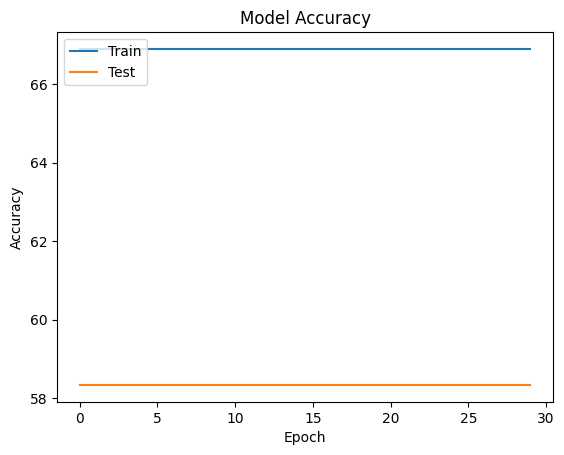

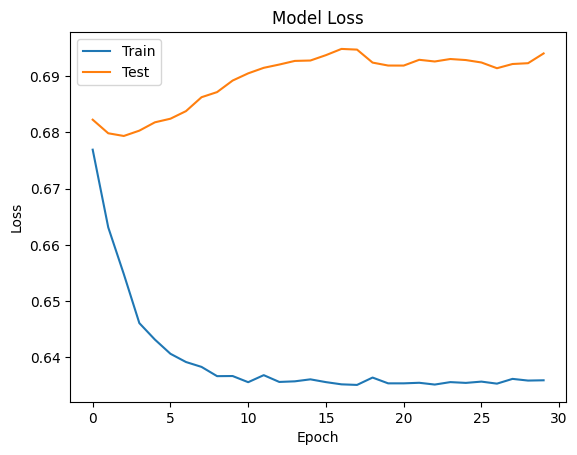

In [ ]:
# summarize history for accuracy
plt.plot(train_accs)
plt.plot(val_accs)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_losses)
plt.plot(val_losses)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
torch.save(model_state_dicts, "My-Model.pt")

# Inference

In [ ]:
def numericalize(text):

    numerialized_source = []
    numerialized_source = [dataset.source_vocab.stoi["<SOS>"]]
    numerialized_source += dataset.source_vocab.numericalize(text)
    numerialized_source.append(dataset.source_vocab.stoi["<EOS>"])

    return numerialized_source

def padding(source):
    padded_sequence = torch.zeros(config.MAX_LEN, 1, dtype = torch.int)
    source = torch.tensor(source)

    if len(source) > config.MAX_LEN:
        padded_sequence[:, 0] = source[: config.MAX_LEN]
    else:
        padded_sequence[:len(source), 0] = padded_sequence[:len(source), 0] + source

    return padded_sequence

In [ ]:
def infer_processing(text):

    text = preprocessing(text)
    text = numericalize(text)
    text = padding(text)
    return text

In [ ]:
def get_similarity(text, aspect):
    try:
#         text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0

def best_aspect(text, aspects):
    a = []

    for aspect in aspects:
        a.append(get_similarity(text, aspect))

    return aspects[np.argmax(a)]


In [ ]:
sample = "I am really impressed with the tshirt's great fit."

ba = best_aspect(preprocessing(sample), aspects)

a = infer_processing(sample).to(config.DEVICE)

In [ ]:
model.eval()
sentiment = model(a)
sentiment = sentiment.cpu().detach().numpy()[0]

if sentiment > 0.5:
    sentiment = 'Positively'
else :
    sentiment = 'Negatively'

In [ ]:
# Analyze aspects and sentiments for each review
results = []
for idx, row in df.iterrows():
    sample = row['clean_review']
    ba = best_aspect(preprocessing(sample), aspects)
    a = infer_processing(sample).to(config.DEVICE)
    model.eval()
    sentiment = model(a)
    sentiment = sentiment.cpu().detach().numpy()[0]
    sentiment_label = 'Positively' if sentiment > 0.5 else 'Negatively'
    results.append({'Review': sample, 'Best Aspect': ba, 'Sentiment': sentiment_label})

# Aggregate results
summary_df = pd.DataFrame(results)
aspect_summary = summary_df['Best Aspect'].value_counts()
sentiment_summary = summary_df['Sentiment'].value_counts()

# Print or visualize the aggregated results
print("Aspect Summary:")
print(aspect_summary)
print("\nSentiment Summary:")
print(sentiment_summary)

Aspect Summary:
Best Aspect
materi     105
look        21
qualiti     17
fit         14
money       13
feel         8
size         3
Name: count, dtype: int64

Sentiment Summary:
Sentiment
Positively    181
Name: count, dtype: int64
